In [ ]:
!pip install langchain
!pip install openai
!pip install langchain-community langchain

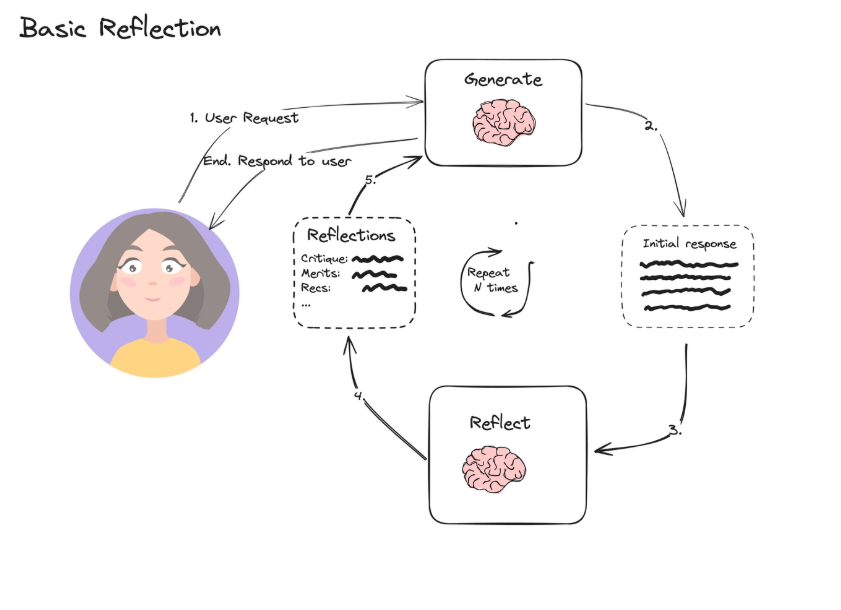

In [2]:
!pip install langgraph

In [ ]:
!pip install -U langchain langchain-openai

In [4]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.prompts import MessagesPlaceholder


In [7]:
os.environ["OPENAI_API_KEY"] = 'OPENAI_API_KEY'
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = 'LANGCHAIN_API_KEY'
os.environ["LANGCHAIN_PROJECT"] = "Langgraph_1"
os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"

In [8]:
generation_prompt = ChatPromptTemplate.from_messages([
    "system","You are a twitter influencer who writes knowledgable tweets on a topic. In case you get critiqued, you refine and rewrite your tweets",
    MessagesPlaceholder(variable_name="messages")
])

In [9]:
reflection_prompt = ChatPromptTemplate.from_messages([
    "system","You are a twitter influencer who critiques tweets and provide detailed recommendations on how to refine a tweet ",
    MessagesPlaceholder(variable_name="messages")
])

In [10]:
llm = ChatOpenAI()

generation_chain = generation_prompt|llm
reflection_chain = reflection_prompt|llm


/tmp/ipython-input-10-2596449446.py:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI()


In [11]:
from typing import List, Sequence
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph import END, MessageGraph


In [12]:
REFLECT = "reflect"
GENERATE = "generate"
graph = MessageGraph()

In [13]:
def generate_node(state):
    return generation_chain.invoke({
        "messages": state
    })


def reflect_node(messages):
    response = reflection_chain.invoke({
        "messages": messages
    })
    return [HumanMessage(content=response.content)]


graph.add_node(GENERATE, generate_node)
graph.add_node(REFLECT, reflect_node)
graph.set_entry_point(GENERATE)


def should_continue(state):
    if (len(state) > 6):
        return END
    return REFLECT




In [14]:
graph.add_conditional_edges(GENERATE, should_continue)
graph.add_edge(REFLECT, GENERATE)

app = graph.compile()


print(app.get_graph().draw_mermaid())
#app.get_graph().print_ascii()

response = app.invoke(HumanMessage(content="What is going to be the next best non-techincal role in the AI world"))

print(response)

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__(<p>__start__</p>)
	generate(generate)
	reflect(reflect)
	__end__(<p>__end__</p>)
	__start__ --> generate;
	generate --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

[HumanMessage(content='What is going to be the next best non-techincal role in the AI world', additional_kwargs={}, response_metadata={}, id='4e1c18e5-12af-40a2-9232-0e282f060aa9'), AIMessage(content='The next best non-technical role in the AI world is likely to be a data ethics or AI ethics specialist. As AI technology continues to advance rapidly, there is a growing need for professionals who can ensure that AI systems are developed and used ethically and responsibly. Data ethics specialists play a crucial role in addressing issues such as bias, privacy, and transparency in AI systems, and their expertise will be in high demand as the field of AI continues to evolve. #AI #DataEthics #E